# 经典的阈值分割算法进行回顾

* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV



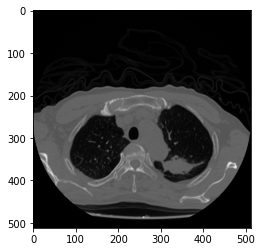

In [1]:
import cv2
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
from scipy import ndimage
filename = r'data/CTs/2/body.nii'
ct2 = sitk.ReadImage(filename)
ct2_array = sitk.GetArrayFromImage(ct2).astype('float32')
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
plt.imshow(img, cmap='gray')
plt.show()

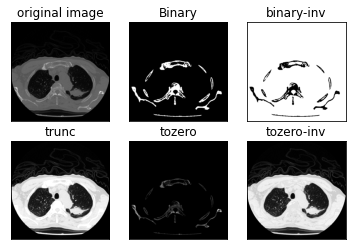

In [2]:
ret , thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret , thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret , thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret , thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['original image','Binary','binary-inv','trunc','tozero','tozero-inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [11]:
#中值滤波
filename = r'data/CTs/2/body.nii'
ct2 = sitk.ReadImage(filename)
ct2_array = sitk.GetArrayFromImage(ct2).astype('float32')
#未进行归一化（）
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
img = cv2.medianBlur(img,5)

ret , th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# 11为block size，2为C值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,2 )
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['original image' , 'global thresholding (v=127)','Adaptive mean thresholding',
          'adaptive gaussian thresholding']
images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1524: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function cv::adaptiveThreshold


In [7]:
filename = r'data/CTs/2/body.nii'
ct2 = sitk.ReadImage(filename)
ct2_array = sitk.GetArrayFromImage(ct2).astype('float32')
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
ret1,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

ret2,th2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#(5,5)为高斯核的大小，0为标准差
blur= cv2.GaussianBlur(img,(5,5),0)

#阀值一定要设为0
ret3,th3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images=[img,0,th1,
         img,0,th2,
         img,0,th3]
titles =['original noisy image','histogram','global thresholding(v=127)',
          'original noisy image','histogram',"otsu's thresholding",
          'gaussian giltered image','histogram',"otus's thresholding"]
#这里使用了pyplot中画直方图的方法，plt.hist要注意的是他的参数是一维数组
#所以这里使用了（numpy）ravel方法，将多维数组转换成一维，也可以使用flatten方法
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]),plt.xticks([]),plt.yticks([])
    
plt.show()

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1406: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function cv::threshold
